# Introduction

 **Loksabha Election Results from 1951 to 2019**. 
 ### This analysis of Janta Graphic is a representation of the changing leads of political parties and their influence in India.

In [1]:
#importing some libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
import matplotlib
import plotly.graph_objects as go
from IPython.core.display import HTML

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/national-parties-data-india-19512019/IndianElection.csv
/kaggle/input/national-parties-data-india-19512019/Variables Description.csv


Lets look at the data

In [2]:
df = pd.read_csv("../input/national-parties-data-india-19512019/IndianElection.csv" )
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  #deleting unnamed columns. I have created this dataset , dont know why there are so many unnamed columns.
df.head(5)


,Year,INC_c,INC_w,INC_DF,INC_votes,CPI_c,CPI_w,CPI_DF,CPI_votes,CPM_c,...,ICSS_w,ICSS_DF,ICSS_votes,Total_cN,Total_wN,Total_seats,Total_DFN,Total_votesN,Total_Valid_votes,Total_electors
0,1951,479,364,4,47665951,49,16,8,3487401,NaN,...,NaN,NaN,NaN,1217,418,489,344,80516821,105950083,173212343
1,1957,490,371,2,57579589,110,27,16,10754075,NaN,...,NaN,NaN,NaN,919,421,494,130,88069597,120513915,193652179
2,1962,488,361,3,51509084,137,29,26,11450037,NaN,...,NaN,NaN,NaN,1269,440,494,362,90407285,115168890,216361569
3,1967,516,283,7,59490701,109,23,41,7458396,59.0,...,NaN,NaN,NaN,1342,440,520,390,111051515,145866510,250207401
4,1971,441,352,4,64033274,87,23,33,6933627,85.0,...,NaN,NaN,NaN,1223,451,518,359,114119663,146602276,274189132


In [3]:
df.Year.unique()

array([1951, 1957, 1962, 1967, 1971, 1977, 1980, 1984, 1989, 1991, 1996,
       1998, 1999, 2004, 2009, 2014, 2019])

We have data about contestents , winning seats and Deposit Fortified candidates from 1951 to 2019.

**Deposit Fortified** : If a candidate fails to get 1/6 of the total valid votes franchised in that constituency then the amount deposited by the candidate is seized by the Election Commission of India. As per Section 34, 1 (a) of the Representation of the People Act,1951

In [4]:
dfc = df.copy()
dfc = dfc.loc[:,~dfc.columns.str.startswith('Total')]
dfc = dfc.loc[:,~dfc.columns.str.endswith('votes')]
dfc = dfc.loc[:,~dfc.columns.str.endswith('c')]
dfc = dfc.loc[:,~dfc.columns.str.endswith('C')]
dfc = dfc.loc[:,~dfc.columns.str.endswith('DF')]
dfc = dfc.fillna(0)
dfc = dfc.astype(int)
dfc = dfc.T.reset_index()

dfc = dfc.rename(columns=dfc.iloc[0]).drop(dfc.index[0])
dfc['Year'] = dfc['Year'].str.replace('_w', '')
dfc.to_csv('win.csv',index=False)


**Bar Chart Race**

In [5]:

HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2681432" data-url="https://flo.uri.sh/visualisation/2681432/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [6]:
dfmelt = pd.melt(df, id_vars=['Year'], value_vars= df.loc[:, df.columns != 'Year'],
        var_name='Party', value_name='Seats')

dfmelt = dfmelt[dfmelt['Party'].str.contains("_w")]
dfmelt = dfmelt[~dfmelt.Party.str.contains("_wN")]
dfmelt.Party = dfmelt.Party.str.replace('_w', '')

dfmelt = dfmelt.pivot(index='Party', columns='Year', values='Seats')
dfmelt = dfmelt.fillna(0)
dfmelt = dfmelt.astype(int)
dfmelt.to_csv('parl.csv',index= True)


# Election Results over the years

In [7]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-parliament" data-src="visualisation/2445706" data-url="https://flo.uri.sh/visualisation/2445706/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

Voting Percentage over the Years & Voting percentage for Natioanl Parties

In [8]:
df['vote_percent'] = (df['Total_Valid_votes'] / df['Total_electors'])*100
df['nvote_percent']= (df['Total_votesN'] / df['Total_electors'])*100
dfvoting = df[['Year', 'vote_percent', 'nvote_percent']]

In [9]:
dfvoting = pd.melt(dfvoting, id_vars=['Year'], value_vars= ['vote_percent','nvote_percent'],
        var_name='total', value_name='percent')

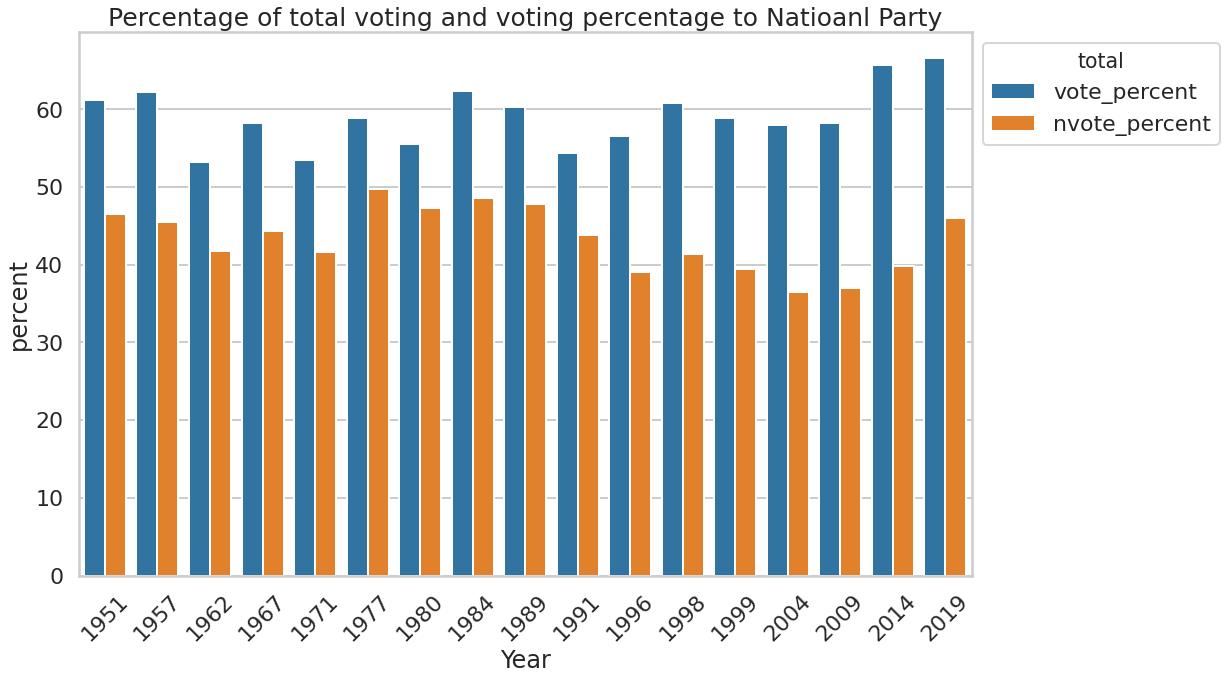

In [10]:
sns.set_context("poster")
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
ax = sns.barplot(x = 'Year', y = 'percent',hue = 'total', data = dfvoting)

plt.xticks(rotation= 45)
plt.title('Percentage of total voting and voting percentage to Natioanl Party',size = 25)
ax.get_legend().set_bbox_to_anchor((1, 1)) #position of legend